# Demo MLP 98% MNIST
_Reconnaissance de digits avec keras grâce au MLP_
___

Exemple d'utilisation de keras pour (très simplement) créer un réseau de neurones de type MLP qui marche du tonerre. J'ai ajouté la visualisation pour que ca paraisse + impressionant.

Source: https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/ pasque j'ai pas que ca à faire que d'écrire tt ca.

## Visualisation de quelques données de MNIST

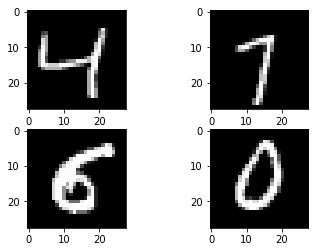

In [183]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[42], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[1784], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[666], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [180]:
import numpy
np = numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [163]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [164]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [165]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [166]:
#normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [167]:
#one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [168]:
#define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

## Vrai bail. On entraine. On a la réponse.
```python
Baseline Error: 1.80% #98.20% de réussite. Ca y va non ? ```

In [169]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
7s - loss: 0.2781 - acc: 0.9212 - val_loss: 0.1413 - val_acc: 0.9571
Epoch 2/10
6s - loss: 0.1116 - acc: 0.9676 - val_loss: 0.0923 - val_acc: 0.9703
Epoch 3/10
7s - loss: 0.0719 - acc: 0.9794 - val_loss: 0.0785 - val_acc: 0.9777
Epoch 4/10
6s - loss: 0.0507 - acc: 0.9856 - val_loss: 0.0752 - val_acc: 0.9766
Epoch 5/10
6s - loss: 0.0376 - acc: 0.9892 - val_loss: 0.0687 - val_acc: 0.9785
Epoch 6/10
7s - loss: 0.0270 - acc: 0.9926 - val_loss: 0.0645 - val_acc: 0.9794
Epoch 7/10
7s - loss: 0.0214 - acc: 0.9946 - val_loss: 0.0622 - val_acc: 0.9804
Epoch 8/10
7s - loss: 0.0143 - acc: 0.9967 - val_loss: 0.0619 - val_acc: 0.9806
Epoch 9/10
6s - loss: 0.0110 - acc: 0.9978 - val_loss: 0.0586 - val_acc: 0.9817
Epoch 10/10
7s - loss: 0.0083 - acc: 0.9983 - val_loss: 0.0588 - val_acc: 0.9814
Baseline Error: 1.86%


## Vérification visuelle de la validité de la solution
Voila c'est joli tu peux changer le N mais ca sert à rien vu que c'est random.

[==========[ESSAI:1/3]==========]
Réponse:  4
Vérité:


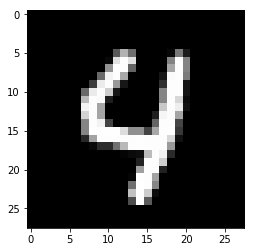

[==========[ESSAI:2/3]==========]
Réponse:  4
Vérité:


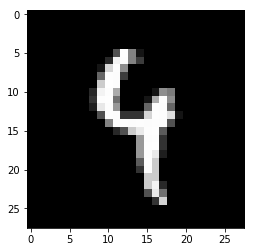

[==========[ESSAI:3/3]==========]
Réponse:  6
Vérité:


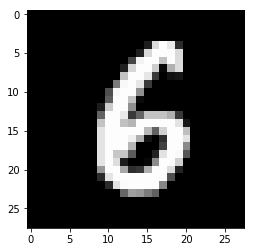

In [187]:
N = 3
for i in range(N):
    print("[==========[ESSAI:", i+1, "/", N, "]==========]", sep="")
    r = np.random.randint(1000)
    
    a = np.array([X_train[r].flatten()])  # WTF the fuck pqr je dois faire ca ?!!

    
    print("Réponse: ", model.predict_classes(a, verbose=0)[0])
    print("Vérité:")
    plt.subplot(111)
    plt.imshow(X_train[r], cmap=plt.get_cmap('gray'))
    plt.show()
